# Importar librerias necesarias

In [153]:
# installar librerias necesarias
!pip install yellowbrick
!pip install plotly
!pip install seaborn
!pip install ace_tools

## Librerias

In [99]:
# tratamiento de datos
import pandas as pd
import numpy as np

# visualización
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
import plotly.express as px

# preparación de datos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.neighbors import NearestNeighbors
from itertools import product

# modelos
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN


# Evaluación
from sklearn.metrics import silhouette_score


# Advertencia
import warnings
warnings.filterwarnings('ignore')

# Datos

In [100]:
datos = pd.read_csv('/content/datos_segmentacion_clientes.csv', sep=';')
datos = datos.sample(4000)
datos.head()

,Edad,Ingresos,Numero_Compras,Gastos,Nivel_Satisfaccion,Ubicacion,Tipo_Cliente,Monto_Compras,Genero,Captado,Cantidad_Quejas
78139,42.5,8882444.5,7.0,1067974.2,Muy_Alto,Villavicencio,Habitual,1015867,Hombre,No,0
13005,39.5,4367781.0,9.0,1074517.8,Bajo,Barranquilla,Habitual,1553626,Mujer,Si,4
47384,44.1,5935555.4,8.0,461039.6,Alto,Medellín,Habitual,1789161,Hombre,Si,6
93371,39.0,4103840.5,8.0,752295.8,Bajo,Santa Marta,Nuevo,1934510,Mujer,No,3
29205,32.1,8071803.6,6.0,1069483.0,Bajo,Bogotá,Nuevo,556901,Hombre,Si,0


In [101]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 78139 to 114331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edad                4000 non-null   float64
 1   Ingresos            4000 non-null   float64
 2   Numero_Compras      4000 non-null   float64
 3   Gastos              4000 non-null   float64
 4   Nivel_Satisfaccion  4000 non-null   object 
 5   Ubicacion           4000 non-null   object 
 6   Tipo_Cliente        4000 non-null   object 
 7   Monto_Compras       4000 non-null   int64  
 8   Genero              4000 non-null   object 
 9   Captado             4000 non-null   object 
 10  Cantidad_Quejas     4000 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 375.0+ KB


## EDA


1.   UNIVARIADO
2.   BIVARIADO
3. MULTIVARIADO



In [102]:
datos.describe()

,Edad,Ingresos,Numero_Compras,Gastos,Monto_Compras,Cantidad_Quejas
count,4000.000000,4.000000e+03,4000.000000,4.000000e+03,4.000000e+03,4000.000000
mean,41.858475,5.698280e+06,6.982250,7.714916e+05,1.209329e+06,3.024500
std,4.973294,1.750697e+06,1.048671,2.386942e+05,4.327107e+05,2.003972
min,22.900000,1.860402e+06,3.000000,2.586629e+05,4.588890e+05,0.000000
25%,38.500000,4.445127e+06,6.000000,5.965294e+05,8.365975e+05,1.000000
50%,41.900000,5.433090e+06,7.000000,7.393372e+05,1.209283e+06,3.000000
75%,45.200000,6.660051e+06,8.000000,9.110148e+05,1.587963e+06,5.000000
max,58.400000,1.572262e+07,10.000000,2.120433e+06,1.958455e+06,6.000000


In [103]:
datos.describe(include='object')

,Nivel_Satisfaccion,Ubicacion,Tipo_Cliente,Genero,Captado
count,4000,4000,4000,4000,4000
unique,5,8,4,2,2
top,Bajo,Medellín,Habitual,Mujer,Si
freq,1114,997,1763,2338,2752


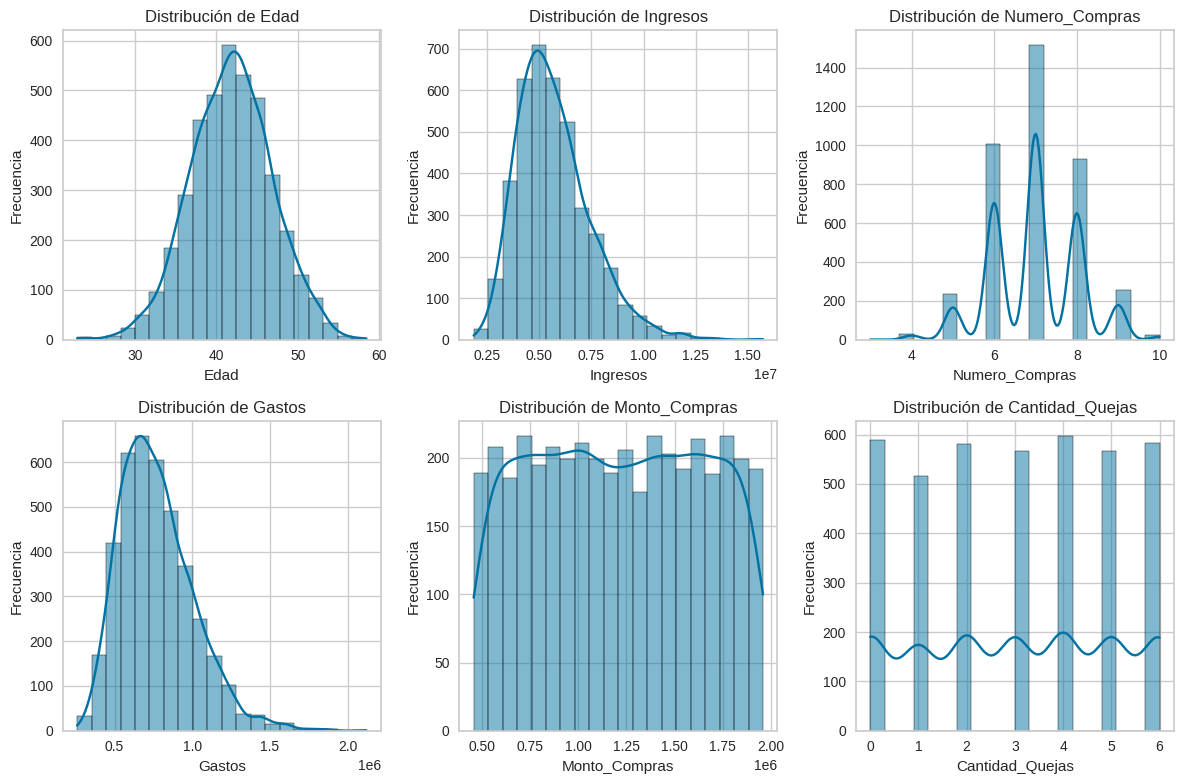

In [104]:
numeric_columns= datos.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12,8))

for i, column in enumerate(numeric_columns, 1):
  plt.subplot(2,3,i)
  sns.histplot(datos[column], bins = 20, kde = True)
  plt.title(f'Distribución de {column}')
  plt.xlabel(column)
  plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

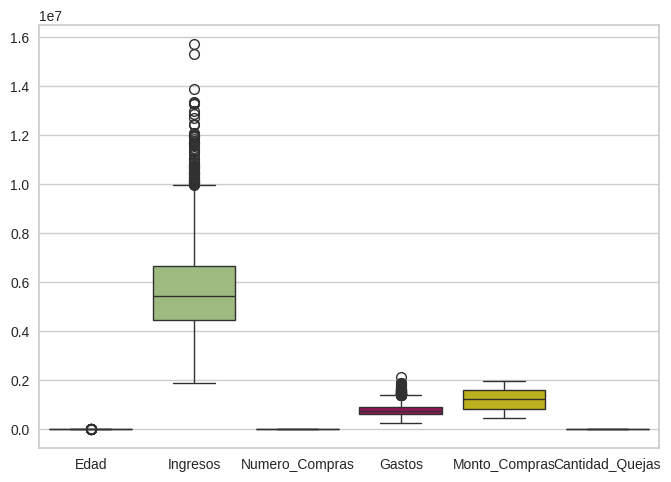

In [105]:
sns.boxplot(data=datos)
plt.show()

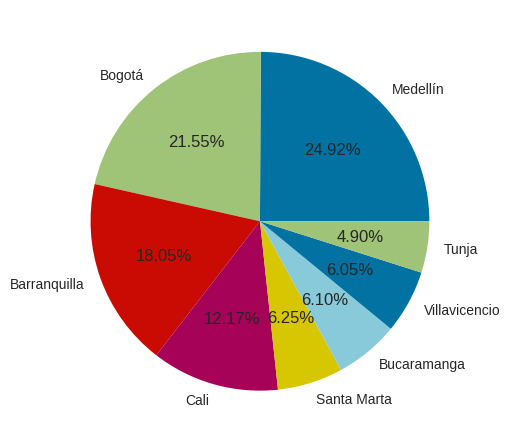

In [106]:
plt.pie(x = datos.Ubicacion.value_counts(), labels = datos.Ubicacion.value_counts().index, autopct = '%.2f%%')
plt.show()

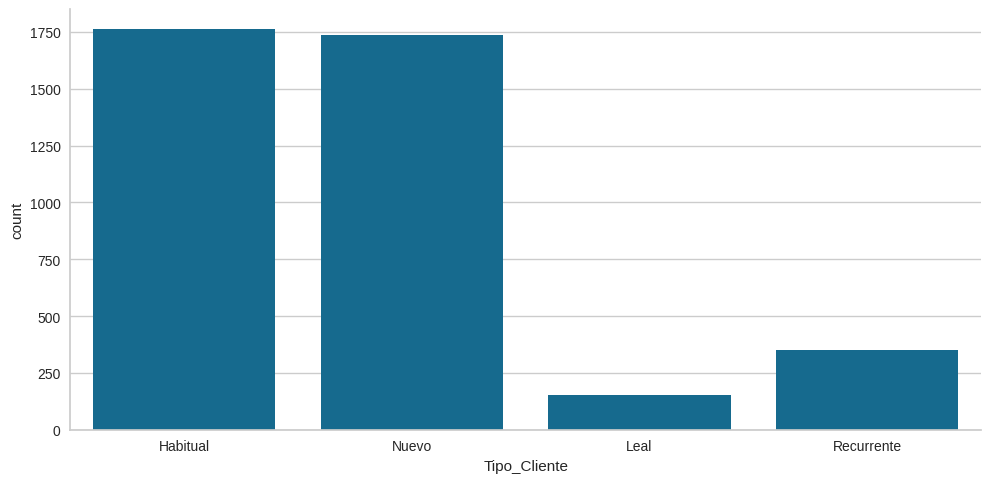

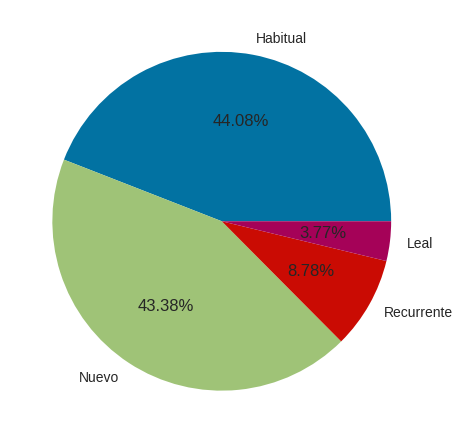

In [107]:
sns.catplot(data=datos, x='Tipo_Cliente', kind='count', aspect= 2)
plt.show()
plt.pie(x = datos.Tipo_Cliente.value_counts(), labels = datos.Tipo_Cliente.value_counts().index, autopct = '%.2f%%')
plt.show()

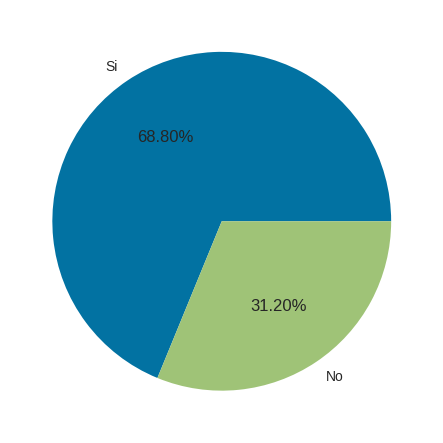

In [108]:
plt.pie(x = datos.Captado.value_counts(), labels = datos.Captado.value_counts().index, autopct = '%.2f%%')
plt.show()

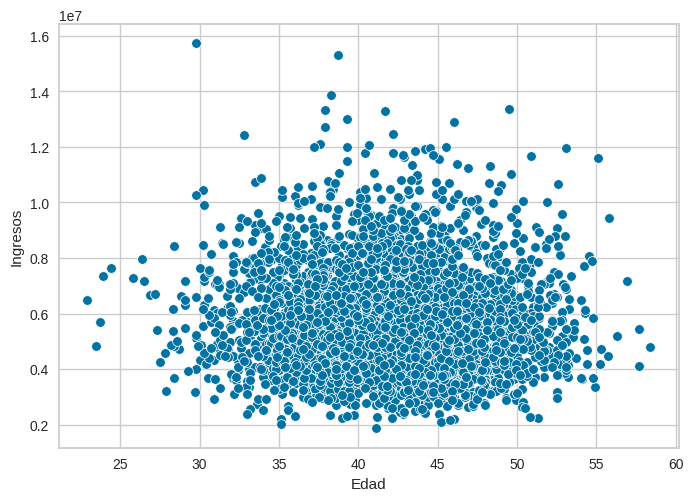

In [109]:
sns.scatterplot(data=datos, x='Edad', y='Ingresos')
plt.show()

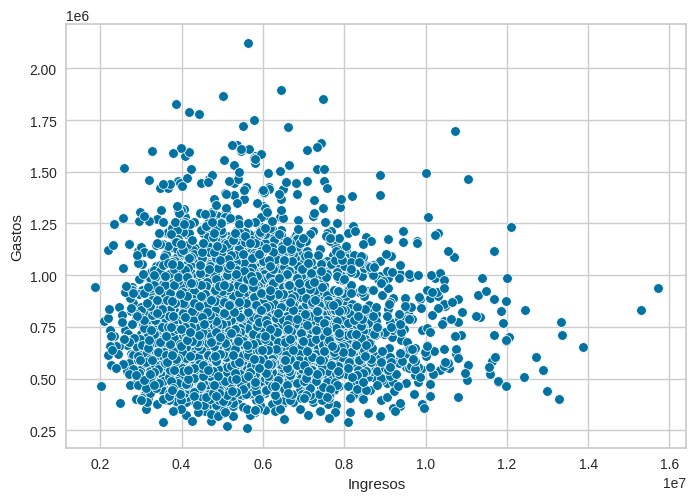

In [110]:
sns.scatterplot(data=datos, x='Ingresos', y='Gastos')
plt.show()

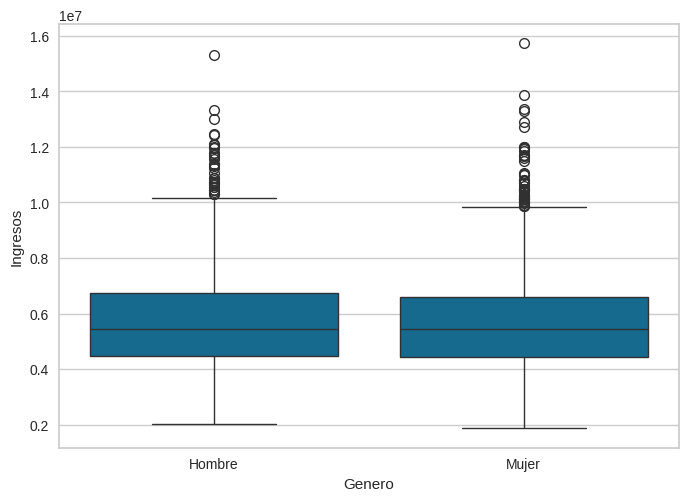

In [111]:
sns.boxplot(data=datos, x='Genero', y='Ingresos')
plt.show()

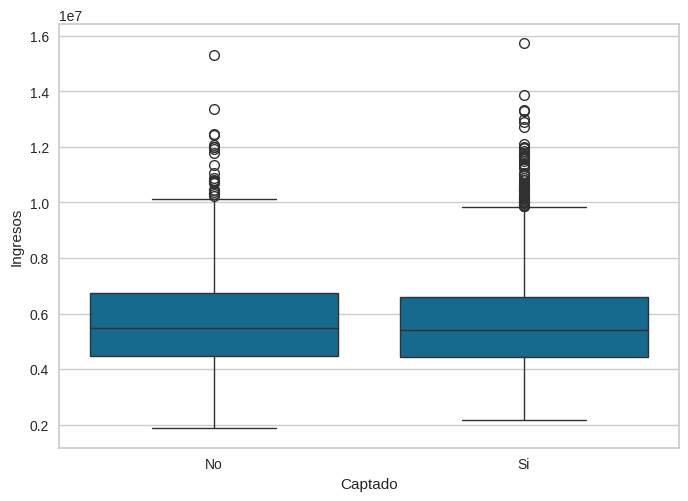

In [112]:
sns.boxplot(data=datos, x='Captado', y='Ingresos')
plt.show()

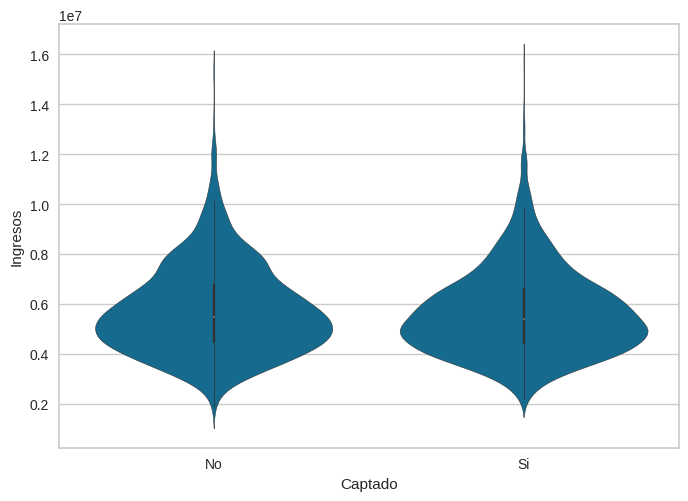

In [113]:
sns.violinplot(data=datos, x='Captado', y='Ingresos')
plt.show()

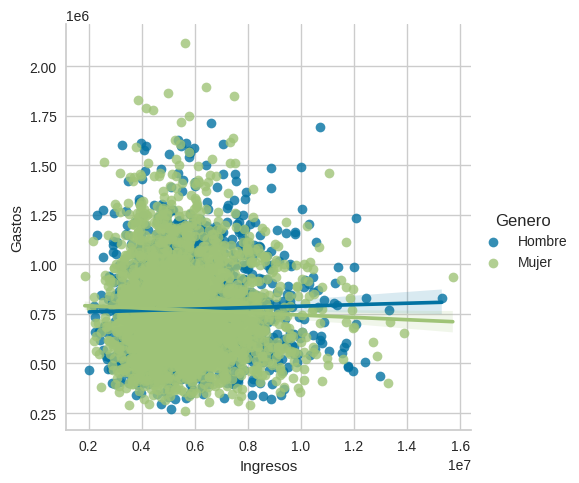

In [114]:
sns.lmplot(data=datos, x='Ingresos', y='Gastos', hue = 'Genero')
plt.show()

In [115]:
fig = px.scatter_3d(datos, x='Ingresos', y='Gastos', z='Edad', color='Genero')
fig.show()

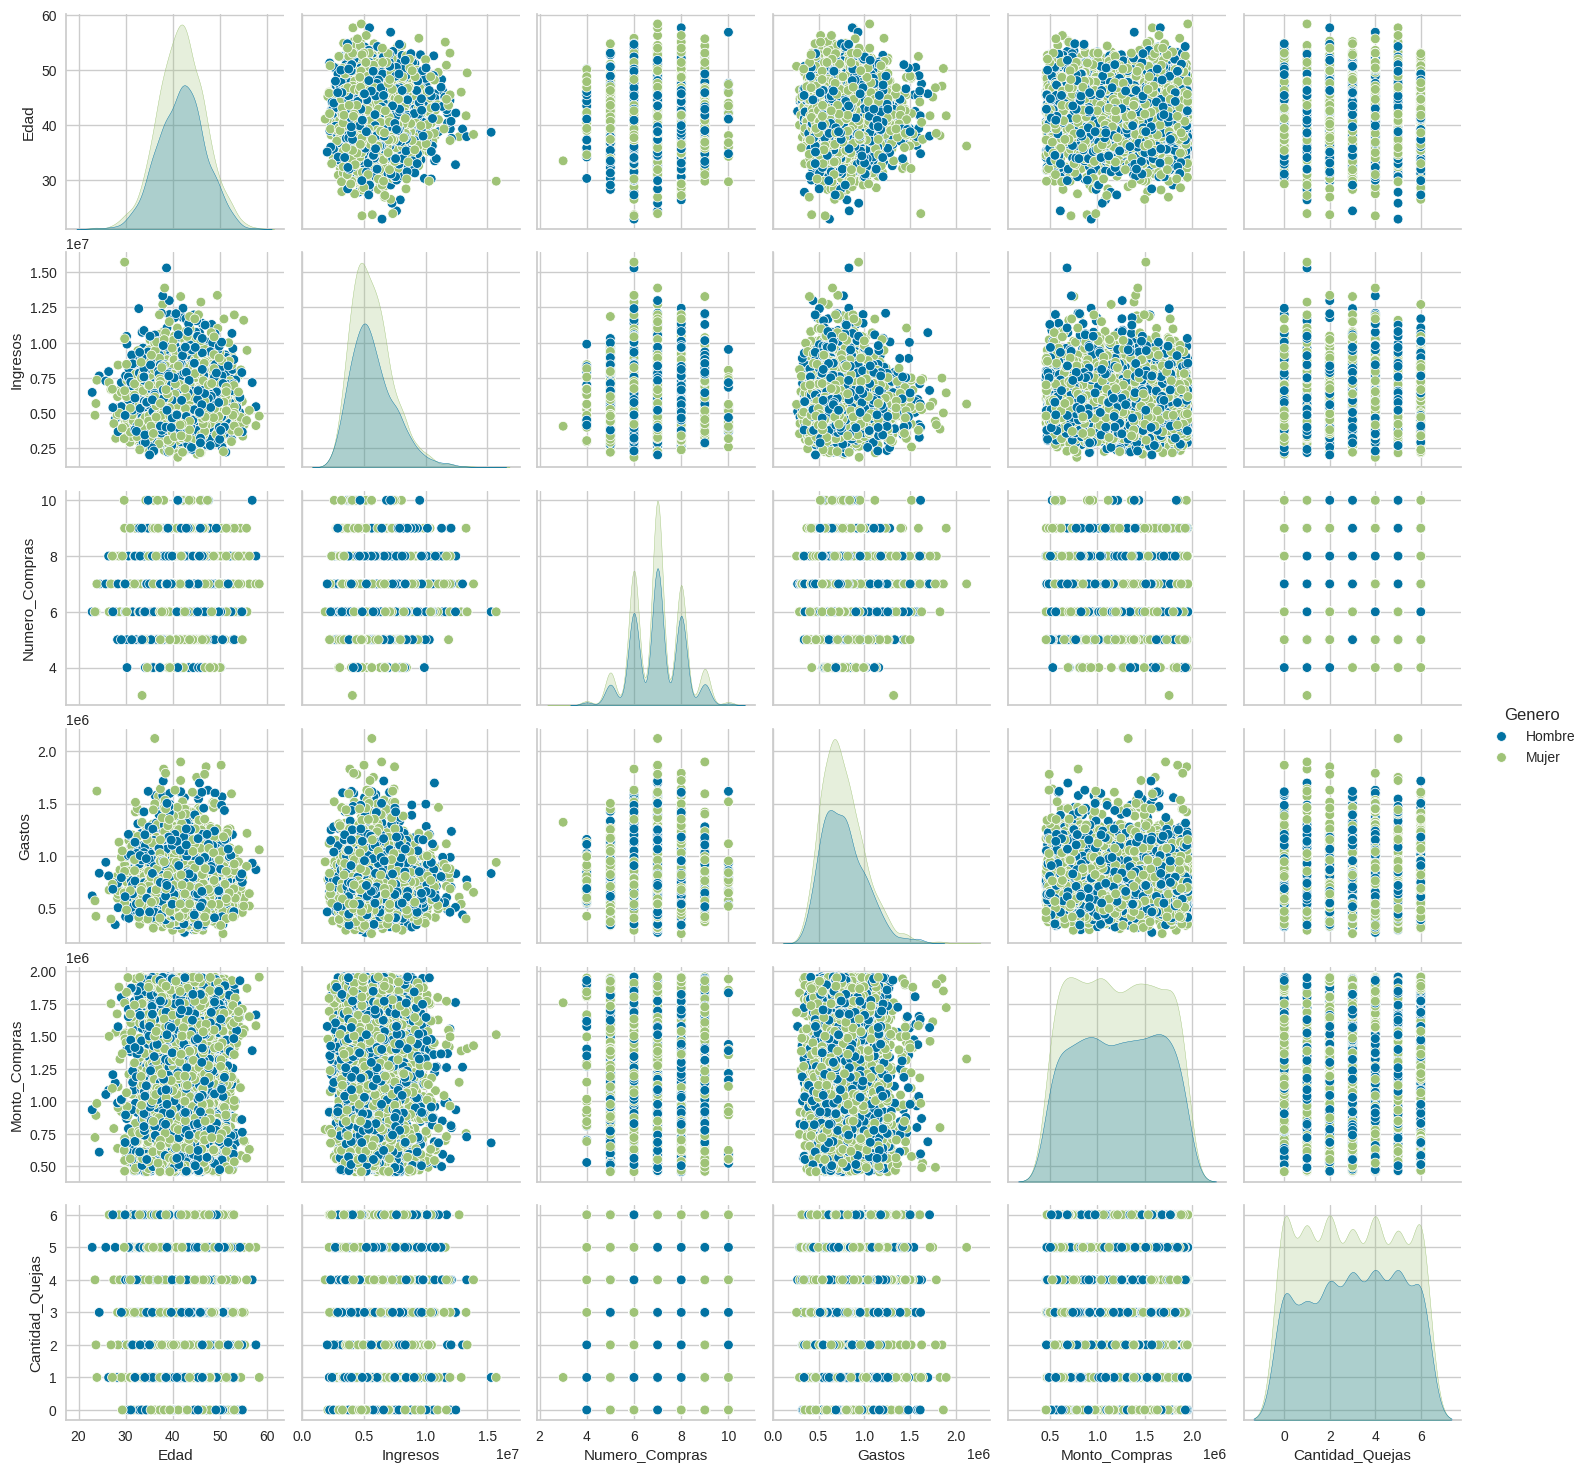

In [116]:
sns.pairplot(datos, hue = 'Genero')
plt.show()

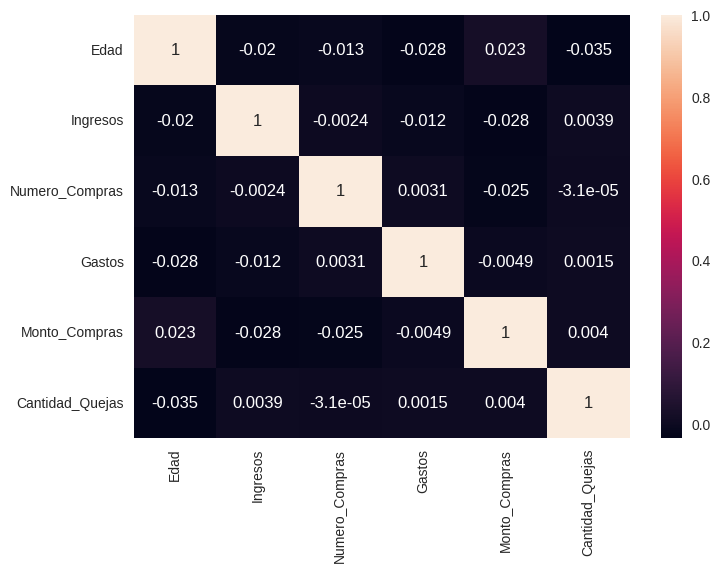

In [117]:
sns.heatmap(datos.corr(numeric_only= True), annot=True)
plt.show()

# PROCESAMIENTO

In [118]:
from sklearn.impute import SimpleImputer
numCols = datos.select_dtypes(include=['float64', 'int64']).columns.to_list()
catCols = datos.select_dtypes(include=['object']).columns.to_list()

numTransformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])


catTransformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numTransformer, numCols),
    ('cat', catTransformer, catCols)
], remainder='passthrough')

set_config(display='diagram')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Edad', 'Ingresos', 'Numero_Compras',
                                  'Gastos', 'Monto_Compras',
                                  'Cantidad_Quejas']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Nivel_Satisfaccion', 'Ubicacion',
                                  'Tipo_Cliente', 'Genero', 'Captado'])])

In [119]:
datosPre = preprocessor.fit_transform(datos)
codCat = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(catCols)
labels =  np.concatenate([numCols, codCat])
datosPro = pd.DataFrame(datosPre, columns=labels)
datosPro.head()

,Edad,Ingresos,Numero_Compras,Gastos,Monto_Compras,Cantidad_Quejas,Nivel_Satisfaccion_Alto,Nivel_Satisfaccion_Bajo,Nivel_Satisfaccion_Medio,Nivel_Satisfaccion_Muy_Alto,...,Ubicacion_Tunja,Ubicacion_Villavicencio,Tipo_Cliente_Habitual,Tipo_Cliente_Leal,Tipo_Cliente_Nuevo,Tipo_Cliente_Recurrente,Genero_Hombre,Genero_Mujer,Captado_No,Captado_Si
0,0.552113,0.506560,0.571429,0.434700,0.371426,0.000000,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.467606,0.180879,0.857143,0.438215,0.730036,0.666667,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.597183,0.293975,0.714286,0.108701,0.887105,1.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.453521,0.161838,0.714286,0.265142,0.984032,0.500000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.259155,0.448081,0.428571,0.435510,0.065360,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# Modelos de Cluster

## KMeans

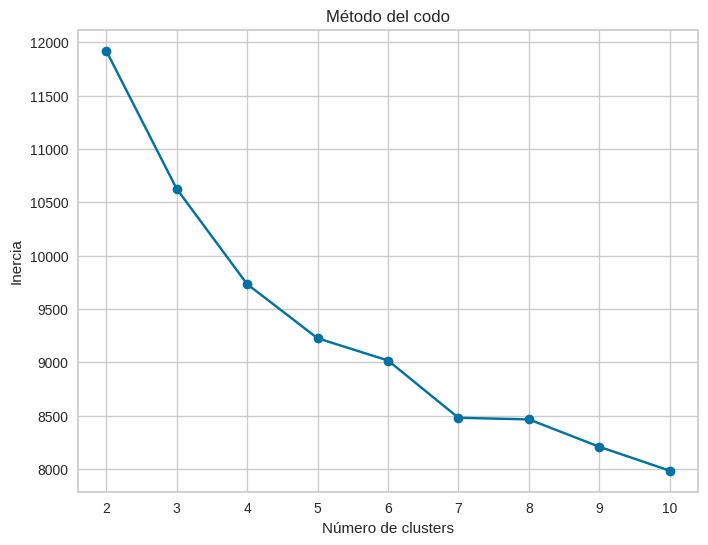

In [120]:
# método del codo

inercia = []

K_range = range(2,11)

for k in K_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(datosPro)
  inercia.append(kmeans.inertia_)

plt.figure(figsize = (8,6))
plt.plot(K_range, inercia, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()


Observando la imagen podria esta al rededor de $K=6$

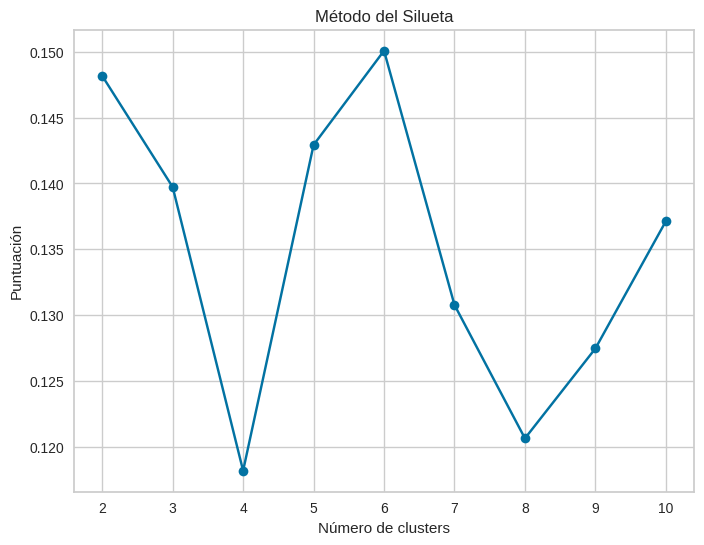

In [121]:
puntuacion = []
K_range = range(2, 11)
for k in K_range:
  modelo_kmeans = KMeans(n_clusters=k, random_state=42, n_init=25)
  labels = modelo_kmeans.fit_predict(datosPro)
  score = silhouette_score(datosPro, labels)
  puntuacion.append(score)

plt.figure(figsize = (8,6))
plt.plot(K_range, puntuacion, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación')
plt.title('Método del Silueta')
plt.show()

In [134]:
modelo_Kmeans = KMeans(n_clusters=6, random_state=42, n_init=25)
modelo_Kmeans.fit(datosPro)
grupos = modelo_Kmeans.predict(datosPro)
datosGrupos = datos.copy()
datosGrupos['Grupos Kmeans'] = grupos
datosGrupos.head()

,Edad,Ingresos,Numero_Compras,Gastos,Nivel_Satisfaccion,Ubicacion,Tipo_Cliente,Monto_Compras,Genero,Captado,Cantidad_Quejas,Grupos Kmeans
78139,42.5,8882444.5,7.0,1067974.2,Muy_Alto,Villavicencio,Habitual,1015867,Hombre,No,0,5
13005,39.5,4367781.0,9.0,1074517.8,Bajo,Barranquilla,Habitual,1553626,Mujer,Si,4,1
47384,44.1,5935555.4,8.0,461039.6,Alto,Medellín,Habitual,1789161,Hombre,Si,6,3
93371,39.0,4103840.5,8.0,752295.8,Bajo,Santa Marta,Nuevo,1934510,Mujer,No,3,0
29205,32.1,8071803.6,6.0,1069483.0,Bajo,Bogotá,Nuevo,556901,Hombre,Si,0,4


In [135]:
centros = pd.DataFrame(modelo_Kmeans.cluster_centers_)
centros.columns = np.concatenate([numCols, codCat])
centros

,Edad,Ingresos,Numero_Compras,Gastos,Monto_Compras,Cantidad_Quejas,Nivel_Satisfaccion_Alto,Nivel_Satisfaccion_Bajo,Nivel_Satisfaccion_Medio,Nivel_Satisfaccion_Muy_Alto,...,Ubicacion_Tunja,Ubicacion_Villavicencio,Tipo_Cliente_Habitual,Tipo_Cliente_Leal,Tipo_Cliente_Nuevo,Tipo_Cliente_Recurrente,Genero_Hombre,Genero_Mujer,Captado_No,Captado_Si
0,0.534470,0.276251,0.570085,0.284587,0.492291,0.496343,0.269592,0.222571,0.210031,0.195925,...,0.075235,0.094044,3.652038e-01,3.918495e-02,4.608150e-01,1.347962e-01,-3.386180e-15,1.000000e+00,1.000000e+00,7.882583e-15
1,0.530879,0.275724,0.563744,0.273634,0.503890,0.503260,0.277506,0.356968,0.255501,0.086797,...,0.020782,0.022005,1.000000e+00,2.498002e-16,4.829470e-15,2.081668e-16,-4.551914e-15,1.000000e+00,-5.051515e-15,1.000000e+00
2,0.535585,0.272329,0.571914,0.267975,0.495334,0.487528,0.231293,0.311791,0.260771,0.123583,...,0.044218,0.055556,4.829470e-15,4.875283e-02,8.458050e-01,1.054422e-01,-4.884981e-15,1.000000e+00,-5.495604e-15,1.000000e+00
3,0.519713,0.279290,0.561307,0.282585,0.507877,0.540823,0.327935,0.265182,0.216599,0.161943,...,0.020243,0.036437,1.000000e+00,-2.081668e-16,-2.886580e-15,2.081668e-16,1.000000e+00,3.774758e-15,-6.106227e-16,1.000000e+00
4,0.540209,0.274957,0.568356,0.266604,0.508142,0.499701,0.247312,0.281362,0.216846,0.159498,...,0.060932,0.073477,-2.775558e-15,6.989247e-02,7.634409e-01,1.666667e-01,1.000000e+00,4.329870e-15,-1.887379e-15,1.000000e+00
5,0.541565,0.285338,0.576815,0.281465,0.498641,0.511475,0.298361,0.191803,0.195082,0.185246,...,0.078689,0.091803,3.573770e-01,7.213115e-02,4.409836e-01,1.295082e-01,1.000000e+00,4.773959e-15,1.000000e+00,7.660539e-15


## Destransformando el modelo


In [136]:
numInverseTransformer = preprocessor.named_transformers_['num'].named_steps['scaler']
catInverseTransformer = preprocessor.named_transformers_['cat'].named_steps['onehot']

centNumInvTrans = numInverseTransformer.inverse_transform(centros[numCols])
centCatInvTrans = catInverseTransformer.inverse_transform(centros[codCat])

centros_transformados = pd.DataFrame(np.concatenate([centNumInvTrans, centCatInvTrans], axis = 1), columns=np.concatenate([numCols, catCols]))
centros_transformados

,Edad,Ingresos,Numero_Compras,Gastos,Monto_Compras,Cantidad_Quejas,Nivel_Satisfaccion,Ubicacion,Tipo_Cliente,Genero,Captado
0,41.873668,5689854.617868,6.990596,788497.825392,1197111.123824,2.978056,Alto,Bogotá,Nuevo,Mujer,No
1,41.74621,5682544.813814,6.94621,768106.612103,1214505.632029,3.01956,Bajo,Medellín,Habitual,Mujer,Si
2,41.913265,5635482.993197,7.003401,757571.147392,1201675.303855,2.92517,Bajo,Medellín,Nuevo,Mujer,Si
3,41.349798,5731976.004858,6.92915,784771.461134,1220483.425101,3.244939,Alto,Medellín,Habitual,Hombre,Si
4,42.077419,5671918.262903,6.978495,755018.88638,1220881.290323,2.998208,Bajo,Medellín,Nuevo,Hombre,Si
5,42.125574,5815818.622787,7.037705,782685.34459,1206634.188525,3.068852,Alto,Bogotá,Nuevo,Hombre,No


In [137]:
datosGrupos

,Edad,Ingresos,Numero_Compras,Gastos,Nivel_Satisfaccion,Ubicacion,Tipo_Cliente,Monto_Compras,Genero,Captado,Cantidad_Quejas,Grupos Kmeans
78139,42.5,8882444.5,7.0,1067974.2,Muy_Alto,Villavicencio,Habitual,1015867,Hombre,No,0,5
13005,39.5,4367781.0,9.0,1074517.8,Bajo,Barranquilla,Habitual,1553626,Mujer,Si,4,1
47384,44.1,5935555.4,8.0,461039.6,Alto,Medellín,Habitual,1789161,Hombre,Si,6,3
93371,39.0,4103840.5,8.0,752295.8,Bajo,Santa Marta,Nuevo,1934510,Mujer,No,3,0
29205,32.1,8071803.6,6.0,1069483.0,Bajo,Bogotá,Nuevo,556901,Hombre,Si,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
51981,38.6,6665775.9,7.0,690215.3,Muy_Alto,Medellín,Habitual,1884986,Mujer,Si,6,1
24446,40.9,4870355.5,6.0,1139608.1,Alto,Bogotá,Nuevo,562768,Hombre,Si,1,4
58834,39.7,3977522.6,7.0,1152048.4,Alto,Medellín,Nuevo,1567829,Hombre,No,3,5
102980,38.8,5203472.0,7.0,718382.5,Medio,Medellín,Recurrente,1511832,Hombre,Si,5,4


In [140]:
datosGrupos["Grupos Kmeans"].value_counts()

,count
Grupos Kmeans,
2,882
1,818
0,638
5,610
4,558
3,494


In [141]:
fig = px.scatter_3d(data_frame = datosGrupos, x = "Ingresos", y = "Gastos", z = "Edad", color = "Grupos Kmeans")
fig.show()

# Agrupamiento jerarquico
## Agrupamiento jerarquico
_Algoritmo jerarquico aglomerativo_:
1. Determinar que cada individuo es un grupo.
2. Calcular la distancia entre cada **grupo**
3. Unir grupos mediante la menor distancia.
4. Repite los pasos 2 y 3 hasta que todos los individuos sean un grupo
5. Dibuja un dendograma
6. Se determina la cantidad de grupos por corte del dendograma


**Metrica de asociacion**
1. Completa o Maxima: Se calculan todas las posibles distancias de los miembros entre los grupos, y se usa la maxima.
2. Simple o Minima: Se calculan todas las posibles distancias de los miembros entre los grupos y se usa la minima.
3. Promedio: se calcula todas las posibles distancias de los miembros entre los grupos y se usa el promedio de esas distancias
4. Asociacion por Triangulacion :
  - *WARD* Maxima variaza _(mas usado)_: Definir un centro y se calcula la distancia entre los grupos

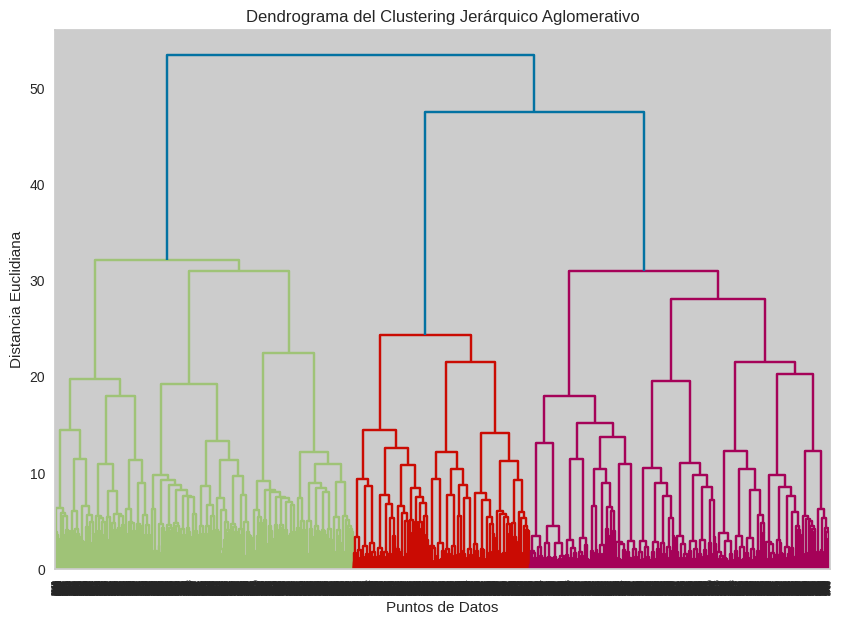

In [143]:
# calcular la matriz de distancia y enlace jerarquico
Z = linkage(datosPro, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma del Clustering Jerárquico Aglomerativo')
plt.xlabel('Puntos de Datos')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [146]:
modelo_aglomerativo = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
modelo_aglomerativo.fit(datosPro)

labels = modelo_aglomerativo.labels_
datosGrupos['Grupos Aglomerativo'] = labels
datosGrupos.head()

,Edad,Ingresos,Numero_Compras,Gastos,Nivel_Satisfaccion,Ubicacion,Tipo_Cliente,Monto_Compras,Genero,Captado,Cantidad_Quejas,Grupos Kmeans,Grupos Aglomerativo
78139,42.5,8882444.5,7.0,1067974.2,Muy_Alto,Villavicencio,Habitual,1015867,Hombre,No,0,5,0
13005,39.5,4367781.0,9.0,1074517.8,Bajo,Barranquilla,Habitual,1553626,Mujer,Si,4,1,1
47384,44.1,5935555.4,8.0,461039.6,Alto,Medellín,Habitual,1789161,Hombre,Si,6,3,2
93371,39.0,4103840.5,8.0,752295.8,Bajo,Santa Marta,Nuevo,1934510,Mujer,No,3,0,0
29205,32.1,8071803.6,6.0,1069483.0,Bajo,Bogotá,Nuevo,556901,Hombre,Si,0,4,2


In [148]:
datosGrupos["Grupos Aglomerativo"].value_counts()

,count
Grupos Aglomerativo,
1,1547
0,1541
2,912


# DBSCAN

## DBScan
Tipos de individuos
1. Punto de nucleo  
   Cuando un punto cumple con el minimo de muestras dentro del radio.
2. Punto de Frontera
   Punto que no es de nucleo, pero esta dentro del rango de otro punto de nucleo
3. Punto de ruido
   No es ninguno de los anteriores

Se hace a partir de 2 hiperparametros:
- Epsilon:  
  Radio de accion de densidad
- Minimo de muestras:  
  Cantidad de individuos en densidad


### Pasos del algoritmo
1. Determinar el radio (epsilon) y los individuos (minimo de muestras).
2. Definir aleatoriamente un individuo de inicialización.
3. Determinar el *tipo de individuo*
4. Moverse de punto
5. Finaliza cuando todos los individuos tienen tipo (son clasificados)

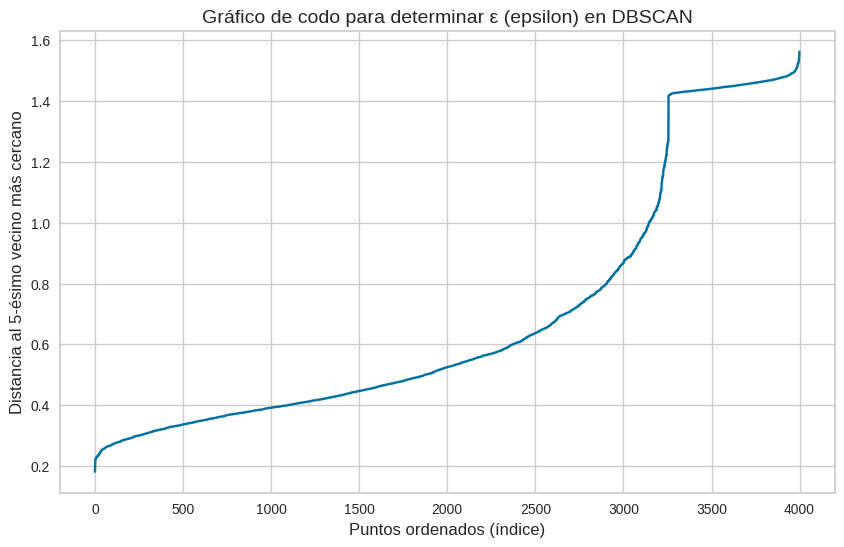

In [149]:
# neighbors debe ser igual a min_samples para que DBSCAN funcione correctamente
min_samples = 5

# Usar NearestNeighbors para calcular distancias a los vecinos más cercanos
neighbors = NearestNeighbors(n_neighbors=min_samples)  # min_samples vecinos
neighbors_fit = neighbors.fit(datosPro)

# Calcular las distancias y los índices de los vecinos
distances, indices = neighbors_fit.kneighbors(datosPro)

# Ordenar las distancias al k-ésimo vecino más cercano
# Seleccionar la distancia al último vecino (el min_samples vecino más cercano)
distances = np.sort(distances[:, min_samples - 1])

# Paso 4: Graficar las distancias
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
plt.plot(distances)
plt.xlabel('Puntos ordenados (índice)', fontsize=12)
plt.ylabel(f'Distancia al {min_samples}-ésimo vecino más cercano', fontsize=12)
plt.title(f'Gráfico de codo para determinar \u03B5 (epsilon) en DBSCAN', fontsize=14)
plt.grid(True)  # Añadir rejilla para mejor visualización
plt.show()


In [160]:
# Definir los rangos de parámetros
valores_eps = np.arange(0.5, 1.3, 0.1)  # Rango de epsilon [0.5, 1.2] con paso de 0.1
min_muestras = np.arange(2, 11)  # min_samples de 2 a 10
parametros = list(product(valores_eps, min_muestras))  # Crear combinaciones de parámetros

sil_score = []  # Lista para almacenar los puntajes de silueta

# Iterar sobre todas las combinaciones de parámetros
for p in parametros:
    eps, min_samples = p
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)  # Crear el modelo DBSCAN

    try:
        # Ajustar y predecir los clusters
        y_pred = dbscan.fit_predict(datosPro)

        # Validar que haya al menos dos clusters y que no todos sean ruido (-1)
        if len(set(y_pred)) > 1 and -1 in y_pred and len(set(y_pred)) > 2:
            # Calcular el índice de silueta solo si hay más de un cluster válido
            score = silhouette_score(datosPro, y_pred)
        else:
            # Asignar -1 si no hay clusters válidos
            score = -1
    except Exception as e:
        # Si hay un error (por ejemplo, todos los puntos son considerados ruido), se asigna -1
        score = -1

    # Almacenar el puntaje de silueta para esta combinación de parámetros
    sil_score.append((eps, min_samples, score))

# Convertir los resultados a un DataFrame para facilitar la visualización
resultados = pd.DataFrame(sil_score, columns=['epsilon', 'min_samples', 'silhouette_score'])

# Mostrar los mejores resultados ordenados por el puntaje de silueta
resultados = resultados[resultados['silhouette_score'] != -1]  # Eliminar resultados inválidos
resultados = resultados.sort_values(by='silhouette_score', ascending=False)  # Ordenar de mejor a peor

# Mostrar los resultados
print(resultados.head())  # Muestra los mejores resultados

    epsilon  min_samples  silhouette_score
63      1.2            2          0.516155
54      1.1            2          0.515438
45      1.0            2          0.512562
36      0.9            2          0.506619
27      0.8            2          0.494499


In [159]:
# # Definir los rangos de parámetros
# valores_eps = np.arange(0.5, 1.3, 0.1)  # Rango de epsilon [0.5, 1.2] con paso de 0.1
# min_muestras = np.arange(2, 11)  # min_samples de 2 a 10
# parametros = list(product(valores_eps, min_muestras))  # Crear combinaciones de parámetros

# sil_scores = []  # Lista para almacenar los puntajes de silueta

# # Iterar sobre todas las combinaciones de parámetros
# for p in parametros:
#     eps, min_samples = p
#     dbscan = DBSCAN(eps=eps, min_samples=min_samples)  # Crear el modelo DBSCAN

#     try:
#         # Ajustar y predecir los clusters
#         y_pred = dbscan.fit_predict(datosPro)

#         # Validar que haya al menos dos clusters y que no todos sean ruido (-1)
#         if len(set(y_pred)) > 1 and -1 in y_pred and len(set(y_pred)) > 2:
#             # Calcular el índice de silueta solo si hay más de un cluster válido
#             score = silhouette_score(datosPro, y_pred)
#         else:
#             # Asignar -1 si no hay clusters válidos
#             score = -1
#     except Exception as e:
#         # Si hay un error (por ejemplo, todos los puntos son considerados ruido), se asigna -1
#         score = -1

#     # Almacenar el puntaje de silueta para esta combinación de parámetros
#     sil_scores.append(score)

# # Crear un DataFrame con los parámetros y puntajes
# df_ajuste_parametros = pd.DataFrame.from_records(parametros, columns=["Epsilon", "Muestras"])
# df_ajuste_parametros["Score"] = sil_scores

# # Crear la tabla pivot para los heatmaps
# datos_cruzados = pd.pivot_table(df_ajuste_parametros, values="Score", index="Muestras", columns="Epsilon")

# # Crear el heatmap usando seaborn
# plt.figure(figsize=(16, 8))
# sns.heatmap(datos_cruzados, annot=True, fmt=".2g", cmap="coolwarm")
# plt.title("Heatmap del Score de Silueta para diferentes valores de Epsilon y Min_samples")
# plt.xlabel("Epsilon")
# plt.ylabel("Min_samples")
# plt.show()

In [161]:
modelo_dbscan = DBSCAN(eps = 1.2, min_samples = 2)
grupos_dbscan = modelo_dbscan.fit_predict(datosPro)

datosGrupos["Grupo DBSCAN"] = grupos_dbscan
datosGrupos

,Edad,Ingresos,Numero_Compras,Gastos,Nivel_Satisfaccion,Ubicacion,Tipo_Cliente,Monto_Compras,Genero,Captado,Cantidad_Quejas,Grupos Kmeans,Grupos Aglomerativo,Grupo DBSCAN
78139,42.5,8882444.5,7.0,1067974.2,Muy_Alto,Villavicencio,Habitual,1015867,Hombre,No,0,5,0,0
13005,39.5,4367781.0,9.0,1074517.8,Bajo,Barranquilla,Habitual,1553626,Mujer,Si,4,1,1,1
47384,44.1,5935555.4,8.0,461039.6,Alto,Medellín,Habitual,1789161,Hombre,Si,6,3,2,2
93371,39.0,4103840.5,8.0,752295.8,Bajo,Santa Marta,Nuevo,1934510,Mujer,No,3,0,0,3
29205,32.1,8071803.6,6.0,1069483.0,Bajo,Bogotá,Nuevo,556901,Hombre,Si,0,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51981,38.6,6665775.9,7.0,690215.3,Muy_Alto,Medellín,Habitual,1884986,Mujer,Si,6,1,1,60
24446,40.9,4870355.5,6.0,1139608.1,Alto,Bogotá,Nuevo,562768,Hombre,Si,1,4,2,15
58834,39.7,3977522.6,7.0,1152048.4,Alto,Medellín,Nuevo,1567829,Hombre,No,3,5,0,108
102980,38.8,5203472.0,7.0,718382.5,Medio,Medellín,Recurrente,1511832,Hombre,Si,5,4,0,359


In [162]:
datosGrupos["Grupo DBSCAN"].value_counts()

,count
Grupo DBSCAN,
-1,123
7,112
6,90
95,69
36,69
...,...
348,2
206,2
207,2


In [163]:
fig = px.scatter_3d(data_frame = datosGrupos, x = "Ingresos", y = "Gastos", z = "Edad", color = "Grupo DBSCAN")
fig.show()

# Definicion del Metodo
Calcular el indice de silhoutte para los 3 modelos, entre más cercano a 1 mejor, y teniendo en cuenta

In [164]:
indice_sil_kmeans = silhouette_score(datosPro, modelo_Kmeans.predict(datosPro))
indice_sil_aglomerativo = silhouette_score(datosPro, modelo_aglomerativo.fit_predict(datosPro))
indice_sil_dbscan = silhouette_score(datosPro, modelo_dbscan.fit_predict(datosPro))

print(f"Indice silhouette KMEANS: {indice_sil_kmeans}")
print(f"Indice silhouette Jerarquico: {indice_sil_aglomerativo}")
print(f"Indice silhouette DBSCAN: {indice_sil_dbscan}")

Indice silhouette KMEANS: 0.15006587589000941
Indice silhouette Jerarquico: 0.1044728580857178
Indice silhouette DBSCAN: 0.5161552117159356
